In [27]:
import json
import re
from collections import Counter


answers = []
one_example = None

with open("training_data.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        d = json.loads(line)
        if one_example is None:
            one_example = d
        letter = get_letter(d.get("response", ""))
        if letter:
            answers.append(letter)

print("Παράδειγμα δεδομένων:")
print(one_example)


def get_letter(text):
    m = re.search(r"Answer Letter:\s*([A-E])", text)
    if m:
        return m.group(1)
print("\nΣύνολο απαντήσεων:", len(answers))
ordered_counts = {letter: counts.get(letter, 0) for letter in ["A","B","C","D","E"]}
print("\nΚατανομή:", ordered_counts)



Παράδειγμα δεδομένων:
{'instruction': 'A 54-year-old African-American man with a history of hypertension and hypercholesterolemia undergoes a treadmill exercise test using the standard Bruce protocol. He stops at 11 minutes 14 seconds because of fatigue, at a peak heart rate of 152 beats/minute and peak systolic blood pressure of 200 mm Hg. The diastolic blood pressure declines by 5 mm Hg during exercise. During recovery, the systolic blood pressure decreases to 15 mm Hg below his pre-exercise pressure. There are no ischemic changes on the ECG during or after exercise. Which of the following is correct? A. His peak systolic blood pressure during exercise exceeds that normally observed B. The change in diastolic blood pressure during exercise is indicative of significant coronary artery disease C. This test is nondiagnostic owing to an inadequate peak heart rate D. These results are consistent with a low prognostic risk of a coronary event E. The postexercise reduction in systolic blood

In [13]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [16]:
# Προσθήκη βιβλιοθηκών
import json, re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

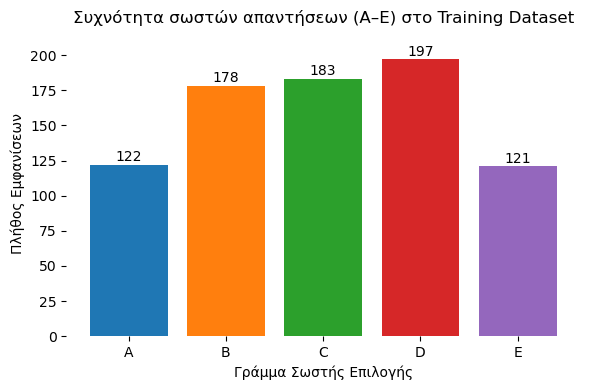

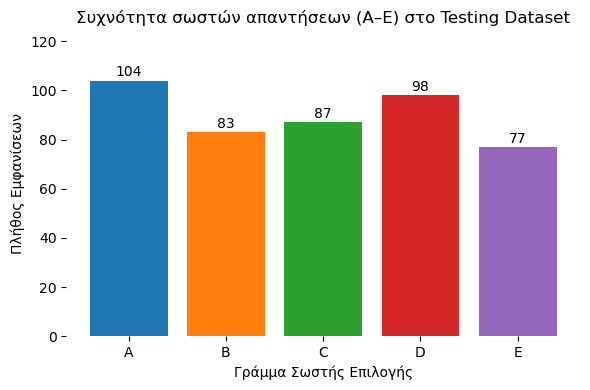

In [18]:
CHOICES = ["A","B","C","D","E"]
COLORS  = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"]  

# Συνάρτηση που διαβάζει τα training δεδομένα από αρχείο .jsonl και εξάγει τα γράμματα από το πεδίο Response
def load_train_letters(jsonl_path):
    pat = re.compile(r"Answer\s*Letter\s*[:\-]?\s*([A-E])", flags=re.IGNORECASE)
    letters = []
    with open(jsonl_path, "r", encoding="utf-8") as f:
        for line in f:
            d = json.loads(line)
            m = pat.search(d.get("response","") or "")
            if m:
                letters.append(m.group(1).upper())
    return letters

# Συνάρτηση που διαβάζει τα testing δεδομένα από αρχείο .csv
def load_test_letters(path, col_idx=0):
    p = Path(path)
    if p.suffix.lower() == ".csv":
        s = pd.read_csv(p, header=None).iloc[:, col_idx]
    else:
        s = pd.read_excel(p, header=None).iloc[:, col_idx]
    letters = s.astype(str).str.strip().str.upper()
    return [l for l in letters if l in CHOICES]

# Συνάρτηση δημιουργίας ραβδογράμματος συχνοτήτων από την λίστα των γραμμάτων
def plot_counts(letters, title):
    counts = Counter(letters)
    values = [counts.get(c, 0) for c in CHOICES]

    plt.figure(figsize=(6,4))
    bars = plt.bar(CHOICES, values, color=COLORS)
    plt.title(title)
    plt.xlabel("Γράμμα Σωστής Επιλογής")
    plt.ylabel("Πλήθος Εμφανίσεων")
    plt.ylim(0, max(values)+20)

    # Τοποθέτηση αριθμών
    for b, v in zip(bars, values):
        plt.text(b.get_x()+b.get_width()/2, b.get_height()+0.5,
                 f"{v}", ha="center", va="bottom", fontsize=10)
    ax = plt.gca()
    for spine in ["top","right","left","bottom"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

# Εφαρμογή των συναρτήσεων στα υπό εξέταση δεδομένα
train_letters = load_train_letters("training_data.jsonl")
test_letters = load_test_letters("correct_letters_test-data.xlsx", col_idx=0)
plot_counts(train_letters, "Συχνότητα σωστών απαντήσεων (A–E) στο Training Dataset")
plot_counts(test_letters, "Συχνότητα σωστών απαντήσεων (A–E) στο Testing Dataset")
